# Accident Severity Prediction Using Environmental Factors

#### A proposal by Harsha Alva

# 1. Introduction/Business Problem

The field of Active Safety with respect to motor vehicles is concerned with the prevention of accidents before they happen. Warning drivers about the possibility of accidents and their severity due to weather, road, and visibility conditions is a new approach to prevent or reduce accidents before they take place.

The proposed Active Safety function will warn drivers to be mindful of the environmental factors affecting the safety and comfort of the occupants of the vehicle, and to take preventive measures to overcome them.

To design the proposed function, existing openly available accident data will be analyzed and a severity prediction model will be designed using the Machine Learning approach. This model can then be implemented in the Active Safety ECUs by vehicle manufacturers.

In the future, the function may be extended to intervene on behalf of the driver considering the threat level to the safety of the occupants of the vehicle. The intervention may be in the form of braking, reduced speed limits, optimisation of sensor sensitivity, etc.

---

# 2. Data

## 2.1. Data Selection

Data scraped from *SDOT Traffic Management Division, Traffic Records Group* is provided in **Data-Collisions.csv**.

## 2.2. Data Understanding

The metadata for the selected data is provided in **Metadata.pdf**. The accident severity classed contained in the metadata are provided below.

| Class | Severity        |
|-------|:----------------|
| 3     | Fatality        |
| 2b    | Serious injury  |
| 2     | Injury          |
| 1     | Property damage |
| 0     | Unknown         |

The data is read by using **pandas** library and displayed to gain insights.

#### Import Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
# import seaborn as sns

In [2]:
%matplotlib inline

#### Read data

In [3]:
df = pd.read_csv('Data-Collisions.csv', low_memory=False)

#### Check shape of the data frame

In [4]:
df.shape

(194673, 38)

#### View first five rows of the data frame

In [5]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### 2.2.1. Attribute requirements

The attributes that we need to build the proposed model are __SEVERITYCODE__, __ROADCOND__, __LIGHTCOND__, and __WEATHER__.

#### Check data type, null and unique values in __SEVERITYCODE__, __ROADCOND__, __LIGHTCOND__, and __WEATHER__.

In [6]:
def inspect_data(_df, col_name):
    print(col_name)
    print('Data type =', _df[col_name].dtype)
    print('Null count =', _df[col_name].isnull().sum())
    print('Unique =', _df[col_name].unique())
    print('')

In [7]:
inspect_data(df, 'SEVERITYCODE')

SEVERITYCODE
Data type = int64
Null count = 0
Unique = [2 1]



In [8]:
inspect_data(df, 'ROADCOND')

ROADCOND
Data type = object
Null count = 5012
Unique = ['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']



In [9]:
inspect_data(df, 'LIGHTCOND')

LIGHTCOND
Data type = object
Null count = 5170
Unique = ['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' nan
 'Unknown' 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']



In [10]:
inspect_data(df, 'WEATHER')

WEATHER
Data type = object
Null count = 5081
Unique = ['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']



## 2.3. Data Preparation

#### Subset required data

In [11]:
dfs = df[['SEVERITYCODE', 'ROADCOND', 'LIGHTCOND', 'WEATHER']].copy()

In [12]:
dfs.shape

(194673, 4)

In [13]:
dfs.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
0,2,Wet,Daylight,Overcast
1,1,Wet,Dark - Street Lights On,Raining
2,1,Dry,Daylight,Overcast
3,1,Dry,Daylight,Clear
4,2,Wet,Daylight,Raining


#### Drop rows with NaN values

In [14]:
dfs.dropna(subset=['ROADCOND', 'LIGHTCOND', 'WEATHER'], inplace=True)

In [15]:
dfs.shape

(189337, 4)

#### Check data type, null and unique values in __SEVERITYCODE__, __ROADCOND__, __LIGHTCOND__, and __WEATHER__.

In [16]:
inspect_data(dfs, 'SEVERITYCODE')
inspect_data(dfs, 'ROADCOND')
inspect_data(dfs, 'LIGHTCOND')
inspect_data(dfs, 'WEATHER')

SEVERITYCODE
Data type = int64
Null count = 0
Unique = [2 1]

ROADCOND
Data type = object
Null count = 0
Unique = ['Wet' 'Dry' 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']

LIGHTCOND
Data type = object
Null count = 0
Unique = ['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' 'Unknown'
 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']

WEATHER
Data type = object
Null count = 0
Unique = ['Overcast' 'Raining' 'Clear' 'Unknown' 'Other' 'Snowing' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']



> At this stage, it is observed that only two classes **property damage** and **injury** are remainining in the data set. Hence, the problem is a binary classification problem.

#### Use label encoding to convert text attributes to numeric form

In [17]:
# label_encoder = preprocessing.LabelEncoder()
def add_encoded_col(_df, col_name):
    _df[col_name + '_CAT'] = _df[col_name].astype('category').cat.codes
#     _df[col_name + '_CAT'] = label_encoder.fit_transform(_df[col_name])
    print(col_name)
    display(_df[col_name + '_CAT'].unique())
    print()

In [18]:
add_encoded_col(dfs, 'ROADCOND')
add_encoded_col(dfs, 'LIGHTCOND')
add_encoded_col(dfs, 'WEATHER')

ROADCOND


array([8, 0, 7, 5, 1, 3, 4, 6, 2], dtype=int8)


LIGHTCOND


array([5, 2, 0, 8, 6, 4, 1, 7, 3], dtype=int8)


WEATHER


array([ 4,  6,  1, 10,  3,  9,  2,  8,  0,  7,  5], dtype=int8)

In [19]:
dfs.head(15)

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,ROADCOND_CAT,LIGHTCOND_CAT,WEATHER_CAT
0,2,Wet,Daylight,Overcast,8,5,4
1,1,Wet,Dark - Street Lights On,Raining,8,2,6
2,1,Dry,Daylight,Overcast,0,5,4
3,1,Dry,Daylight,Clear,0,5,1
4,2,Wet,Daylight,Raining,8,5,6
5,1,Dry,Daylight,Clear,0,5,1
6,1,Wet,Daylight,Raining,8,5,6
7,2,Dry,Daylight,Clear,0,5,1
8,1,Dry,Daylight,Clear,0,5,1
9,2,Dry,Daylight,Clear,0,5,1


#### Check for sample balance in __SEVERITYCODE__

In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28    
https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

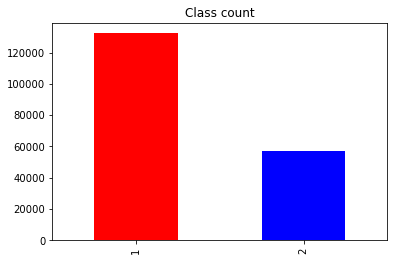

In [20]:
vc = dfs['SEVERITYCODE'].value_counts()
display(vc)
vc.plot(kind='bar', x='SEVERITYCODE', title='Class count', color=['r', 'b']);

We observe that serverity '2' has lesser samples than '1'. Hence, we downsample rows with severity '1' to balance both the classes.

#### Randomly remove excess rows with __SEVERITYCODE__ 1

In [21]:
excess = vc[1] - vc[2]
drop_idx = np.random.choice(dfs[dfs['SEVERITYCODE'] == 1].index, excess, replace=False)
dfsr = dfs.drop(drop_idx).copy()

2    57052
1    57052
Name: SEVERITYCODE, dtype: int64

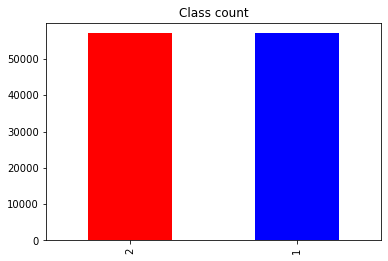

In [22]:
vc2 = dfsr['SEVERITYCODE'].value_counts()
display(vc2)
vc2.plot(kind='bar', x='SEVERITYCODE', title='Class count', color=['r', 'b']);

In [23]:
dfsr.reset_index(drop=True, inplace=True)

In [24]:
dfsr.head(15)

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,ROADCOND_CAT,LIGHTCOND_CAT,WEATHER_CAT
0,2,Wet,Daylight,Overcast,8,5,4
1,2,Wet,Daylight,Raining,8,5,6
2,2,Dry,Daylight,Clear,0,5,1
3,2,Dry,Daylight,Clear,0,5,1
4,2,Dry,Dark - Street Lights On,Clear,0,2,1
5,2,Dry,Daylight,Overcast,0,5,4
6,2,Dry,Daylight,Clear,0,5,1
7,2,Dry,Dark - Street Lights On,Clear,0,2,1
8,2,Dry,Daylight,Clear,0,5,1
9,2,Dry,Daylight,Clear,0,5,1


Now the data is ready for modelling.

---

# 3. Methodology

At this stage, various Machine Learning algorithms will be evaluated and the one that gives the best result will be selected as our predictor model.

Since the problem is one in which an accident severity has to be predicted out of the two remaining classes, it is a binary classification problem. Hence, the classification algorithms mentioned below will be evaluated:

1. Decision Tree
2. k-Nearest Neighbour (kNN)
3. Logistic Regression
4. Support Vector Machines (SVM)

But before we start, we have to convert the data that can be read by the classification libraries and we have to split the data sets for testing and training.

## 3.1. Data Preparation

#### Convert the balanced table to numpy arrays

In [25]:
y = np.asarray(dfsr['SEVERITYCODE'])
X = np.asarray(dfsr[['ROADCOND_CAT', 'LIGHTCOND_CAT', 'WEATHER_CAT']])

#### Scale values

In [26]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

#### Split arrays into train and test subsets

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

## 3.2. Classifier Selection

To find the best parameters for the various classifiers, an exhaustive search over specified parameter values for each estimator is performed. For this purpose, **GridSearchCV** method from the **sklearn** library is used.

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
def get_best_hyperparams(_gs):
    print('Best score: ', _gs.best_score_)
    print('Best params: ', _gs.best_params_)
    return _gs.best_estimator_

### 3.2.1. Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

#### Define parameter grid 

In [31]:
param_DT = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [*range(4, 18, 2)],
}

#### Search grid and find best hyperparameters

In [32]:
GS_DT = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_DT, cv=5, return_train_score=True, n_jobs=-1, verbose=1)
GS_DT.fit(X, y)
model_DT = get_best_hyperparams(GS_DT)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s


Best score:  0.5615751671133662
Best params:  {'criterion': 'entropy', 'max_depth': 6}


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    9.1s finished


#### Predict test set using best hyperparameters

In [33]:
yhat_DT = model_DT.predict(X_test)

### 3.2.2. k-Nearest Neighbour (kNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
param_kNN = {
    'algorithm': ['auto'],
    'n_neighbors': [*range(15, 26, 2)],
}

In [36]:
GS_kNN = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_kNN, cv=5, return_train_score=True, n_jobs=-1, verbose=1)
GS_kNN.fit(X, y)
model_kNN = get_best_hyperparams(GS_kNN)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.0min finished


Best score:  0.539770592771292
Best params:  {'algorithm': 'auto', 'n_neighbors': 25}


In [37]:
yhat_kNN = model_kNN.predict(X_test)

### 3.2.3. Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
param_LR = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [*range(1, 11, 1)],
}

In [40]:
GS_LR = GridSearchCV(estimator=LogisticRegression(), param_grid=param_LR, cv=5, return_train_score=True, n_jobs=-1, verbose=1)
GS_LR.fit(X, y)
model_LR = get_best_hyperparams(GS_LR)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   37.8s finished


Best score:  0.5335043725774817
Best params:  {'C': 1, 'solver': 'newton-cg'}


C:\Users\Harsha\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Harsha\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [41]:
yhat_LR = model_LR.predict(X_test)

### 3.2.4. Support Vector Machines (SVM)

In [42]:
from sklearn.svm import LinearSVC

In [43]:
param_SVM = {
    'C': [*range(1, 11, 1)],
}

In [44]:
GS_SVM = GridSearchCV(estimator=LinearSVC(), param_grid=param_SVM, cv=5, return_train_score=True, n_jobs=-1, verbose=1)
GS_SVM.fit(X, y)
model_SVM = get_best_hyperparams(GS_SVM)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.5min finished


Best score:  0.5335394276248397
Best params:  {'C': 1}


In [45]:
yhat_SVM = model_SVM.predict(X_test)

## 3.3. Classifier Evaluation

In [46]:
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, plot_confusion_matrix

In [47]:
df_res = pd.DataFrame(data=None, dtype='int8',
                      index=['DT', 'kNN', 'LR', 'SVM'],
                      columns=['Accuracy Score', 'Jaccard Score', 'F1 Score'])

In [48]:
def calc_res(idx, yhat):
    df_res.loc[idx] = [accuracy_score(y_test, yhat),
                    jaccard_score(y_test, yhat),
                    f1_score(y_test, yhat)]

In [49]:
def show_confusion_matrix(_model, idx):
    disp = plot_confusion_matrix(_model, X_test, y_test, normalize='true')
    disp.ax_.set_title('Confusion matrix: ' + str(idx))

#### Evaluate classifer performance

In [50]:
calc_res('DT', yhat_DT)
calc_res('kNN', yhat_kNN)
calc_res('LR', yhat_LR)
calc_res('SVM', yhat_SVM)

---

# 4. Results

In [51]:
df_res

,Accuracy Score,Jaccard Score,F1 Score
DT,0.561632,0.277950,0.434994
kNN,0.560273,0.289205,0.448657
LR,0.532974,0.286470,0.445358
SVM,0.532974,0.286470,0.445358


In [52]:
print('Max Accuracy Score:', df_res['Accuracy Score'].idxmax())
print('Max Jaccard Score:', df_res['Jaccard Score'].idxmax())
print('Max F1 Score:', df_res['F1 Score'].idxmax())

Max Accuracy Score: DT
Max Jaccard Score: kNN
Max F1 Score: kNN


> From the above table, it is observed that Logistic Regression and SVM are very close in the evaluation metrics.

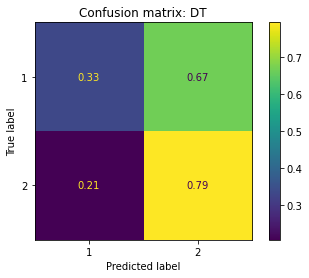

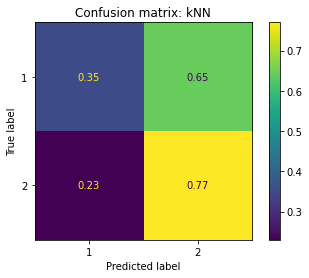

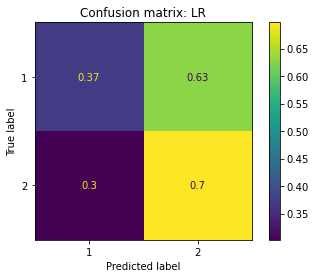

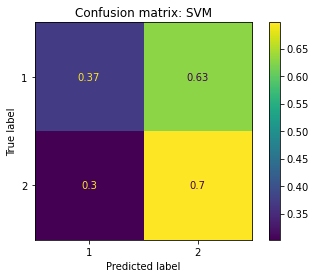

In [53]:
show_confusion_matrix(model_DT, 'DT')
show_confusion_matrix(model_kNN, 'kNN')
show_confusion_matrix(model_LR, 'LR')
show_confusion_matrix(model_SVM, 'SVM')

---

# 5. Discussion

The business problem definition outlined the data needed for the proposed work. The data was subsequently obtained from publicly available sources. In the data preparation stage, the data was observed, and the necessary subset was selected. Then the tuples (rows) containing empty values were pruned. 

At this stage, it was observed that only two classes **property damage** and **injury** were remainining in the dataset. Hence, the problem was that of binary classification. The labels in the attirbutes were then converted to numbers by using label encoding. Subsequently, the cleaned data classed were found to be unbalanced. The class with more samples was undersampled to get a fully balanced data set.

As the problem was one of classification, so four Machine Learning classification algorithms were chosen. The balanced samples were normalized and then split into train and test sets. The best hyperparameters for each classification algorithm were obtained by using grid search. The best model under each classifier was then used to predict the classes using the test set. 

Finally, the models were evaluated by obtaining the evalution metrics. Logistic Regression and SVM were the most accurate models. But due to the binary nature of classification, choosing Logistic Regression is optimal for the problem at hand.

## 5.1 Libraries used

1. **pandas:** data management and analysis
2. **numpy:** data handling and conversion
3. **matplotlib:** plotting
4. **sklearn:** machine learning alogirthms and evaluation metrics

---

# 6. Conclusion

This work proposed a novel model to predict the severity of accident based on the environmental factors. Various classifiers were evaluated and Logistic Regression and SVM were found to be the most accurate in predicting the accident severity. But due to the binary nature of the available classes, Logistic Regression was thought to be the optimum algorithm.

More data consisting of a few million instances of accidents may be needed to develop this model to a safe working level that could be implemented in a test vehicle. This propsal will be presented to the business leaders for their decision to allocate resources for further research on this proposal. 